# HighDensityRegionAlgorithm

Demonstrate 2-dimensional high density region algorithm with OpenTURNS.

Given $\alpha \in [0,1]$, the minimum volume level set algorithm searches for $p \in [0, 1]$ with:
$$
P(X \in A(p)) = \alpha,
$$
where
$$
A(p)=\{X \in \mathbb{R}^n \; | \; f(x) > p\}.
$$
In other words, given a level set $\alpha$, we are looking for the probability density value $p$ so that the probability to have a point density greater or equal to $p$ is $\alpha$.

In [1]:
import os
import openturns as ot
from othdrplot import HighDensityRegionAlgorithm
import othdrplot
import openturns.viewer as otv

The minimum volume level set computation requires a sampling which can be costly with the default value of the parameters, due to a huge sampling size. Hence, we reduce it to 500.

In [2]:
numberOfPointsForSampling = 500
ot.ResourceMap.SetAsBool("Distribution-MinimumVolumeLevelSetBySampling", True)
ot.ResourceMap.Set(
    "Distribution-MinimumVolumeLevelSetSamplingSize", str(numberOfPointsForSampling)
)

Load the csv data file.

In [3]:
filename = os.path.join(othdrplot.__path__[0], "data/gauss-mixture.csv")
sample = ot.Sample.ImportFromCSVFile(filename)
sample

class=Sample name=/home/devel/GIT/othdrplot/othdrplot/data/gauss-mixture.csv implementation=class=SampleImplementation name=/home/devel/GIT/othdrplot/othdrplot/data/gauss-mixture.csv size=1000 dimension=2 description=[X0,X1] data=[[0.806851,-1.69008],[2.22223,-1.95101],[1.75679,-0.88062],...,[-0.144572,-1.75943],[0.812519,-2.3216],[-0.525143,2.01341]]

In order to run the algorithm, we must estimate the distribution of the data. In this example, we use a density KernelSmoothing estimator.

In [4]:
myks = ot.KernelSmoothing()
distribution = myks.build(sample)

In [5]:
mydp = HighDensityRegionAlgorithm(sample, distribution)
mydp.run()

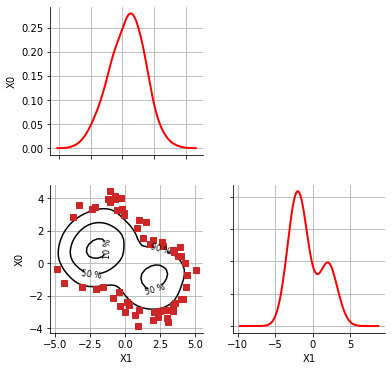

In [6]:
grid = mydp.draw()
view = otv.View(grid).getFigure().set_size_inches(6.0, 6.0)

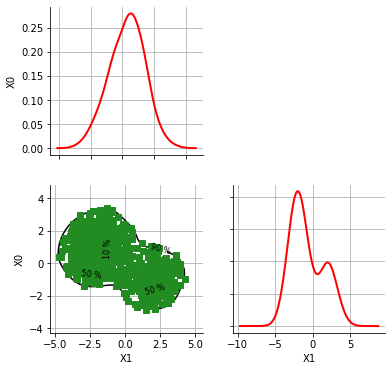

In [7]:
grid = mydp.draw(drawInliers=True, drawOutliers=False)
view = otv.View(grid).getFigure().set_size_inches(6.0, 6.0)

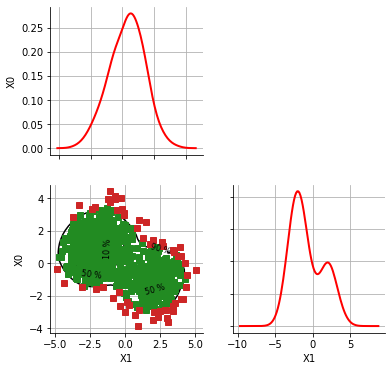

In [8]:
grid = mydp.draw(drawInliers=True, drawOutliers=True)
view = otv.View(grid).getFigure().set_size_inches(6.0, 6.0)

In [9]:
print("Outliers at alpha=%.4f" % (mydp.outlierAlpha))
outlierIndices = mydp.computeOutlierIndices()
outlierIndices

Outliers at alpha=0.9000


[31,
 60,
 84,
 105,
 116,
 121,
 150,
 151,
 200,
 207,
 215,
 218,
 220,
 248,
 282,
 284,
 291,
 359,
 361,
 378,
 382,
 404,
 412,
 418,
 425,
 426,
 433,
 449,
 450,
 457,
 461,
 466,
 474,
 490,
 498,
 567,
 587,
 616,
 634,
 638,
 652,
 665,
 687,
 714,
 729,
 730,
 748,
 751,
 794,
 876,
 894,
 896,
 903,
 925,
 928,
 963,
 968,
 987]